In [1]:
import numpy as np
import qiskit as q
from numpy.linalg import inv
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit.providers.backend import BackendV1
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

In [ ]:
qubit_count = 2
qreg = QuantumRegister(qubit_count, 'q')
creg = ClassicalRegister(qubit_count, 'c')

initial_states = {}

# Prepare Sate of Qubit0
default_circuits = QuantumCircuit(qreg, creg)
# default_circuits.reset(range(2))
q0_states = {
    'zero': default_circuits.copy(),
    'one': default_circuits.copy(),
    'plus': default_circuits.copy(),
    'right': default_circuits.copy()
}
q0_states['one'].x(0)
q0_states['plus'].h(0)
q0_states['right'].h(0); q0_states['right'].s(0)

if qubit_count == 1:
    print(q0_states)

# Prepare State of Qubit1 if needed
q1_states = {
    'zero': default_circuits.copy(),
    'one': default_circuits.copy(),
    'plus': default_circuits.copy(),
    'right': default_circuits.copy()
    }
q1_states['one'].x(1)
q1_states['plus'].h(1)
q1_states['right'].h(1); q1_states['right'].s(1)

for q0k, qc0 in q0_states.items():
    for q1k, qc1 in q1_states.items():
        new_circ = qc0.compose(qc1)
        initial_states[f"q0{q0k}_q1{q1k}"] = new_circ

In [ ]:
qubit_count = 2
qreg = QuantumRegister(qubit_count, 'q')
creg = ClassicalRegister(qubit_count, 'c')

initial_states = {}

# Prepare State of Qubit1 if needed
q1_states = {
    'zero': default_circuits.copy(),
    'one': default_circuits.copy(),
    'plus': default_circuits.copy(),
    'right': default_circuits.copy()
    }
q1_states['one'].x(1)
q1_states['plus'].h(1)
q1_states['right'].h(1); q1_states['right'].s(1)

# Prepare Sate of Qubit0
default_circuits = QuantumCircuit(qreg, creg)
default_circuits.reset(range(2))
q0_states = {
    'zero': default_circuits.copy(),
    'one': default_circuits.copy(),
    'plus': default_circuits.copy(),
    'right': default_circuits.copy()
}
q0_states['one'].x(0)
q0_states['plus'].h(0)
q0_states['right'].h(0); q0_states['right'].s(0)

for q0k, qc0 in q0_states.items():
    for q1k, qc1 in q1_states.items():
        new_circ = qc0.compose(qc1)
        initial_states[f"q0{q0k}_q1{q1k}"] = new_circ



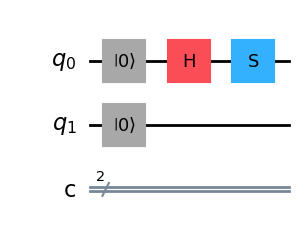

In [10]:
initial_states['q0plus_q1right'].draw(output='mpl')
q0_states['right'].draw(output='mpl')